# WeRateDogs Initial Analysis
![image.jpg](https://www.thelabradorsite.com/wp-content/uploads/2018/07/small-dog-breed-long.jpg)

In [67]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
# My colors to be used in exploration
green1 = [22/256, 111/256, 76/256]
blue1 = [29/256, 82/256, 120/256]
green2 = [0/256, 83/256, 47/256]
blue2 = [38/256, 51/256, 86/256]
green3 = [50/256, 199/256, 127/256]
blue3 = [26/256, 196/256, 219/256]
red1 = [125/256, 25/256, 0/256]
red2 = [178/256, 24/256, 71/256]

## Importing Data

In [53]:
data = pd.read_csv('twitter_archive_master.csv')

In [54]:
data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,0,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,0,0,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,0,0,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


# Number of features and observations

In [55]:
print("Total number of rows: ", data.shape[0])
print("Total number of colums: ", data.shape[1])

Total number of rows:  1964
Total number of colums:  25


## Common Rating Denominators

In [56]:
data.rating_denominator.value_counts()

10     1947
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

# Top Common Ratings

In [57]:
data.rating_numerator.value_counts()[:10]

12    444
10    416
11    392
13    249
9     150
8      95
7      52
5      33
14     33
6      32
Name: rating_numerator, dtype: int64

# Source Distribution

In [58]:
data.source.value_counts()

http://twitter.com/download/iphone              1926
http://twitter.com                                28
https://about.twitter.com/products/tweetdeck      10
Name: source, dtype: int64

# Top Common Names

In [59]:
data.name.value_counts()[:10]

Oliver     10
Cooper     10
Charlie    10
Penny       9
Lucy        9
Tucker      9
Winston     8
Sadie       8
Lola        7
Daisy       7
Name: name, dtype: int64

# Favorites Feature

In [60]:
data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

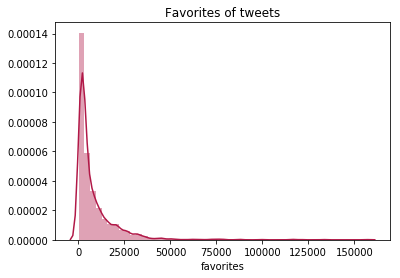

In [73]:
sns.distplot(data.favorites, color=red2)
plt.title('Favorites of tweets');

There are ouliers

## Zomming in!

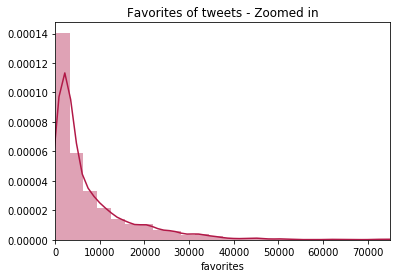

In [94]:
sns.distplot(data.favorites, color=red2)
plt.title('Favorites of tweets - Zoomed in');
plt.xlim(0, 75000);

## Observing outliers in `favorites`

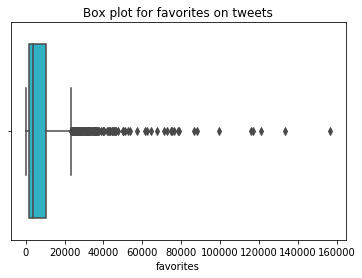

In [79]:
sns.boxplot(data=data, x="favorites", color=blue3)
plt.title('Box plot for favorites on tweets');

### Most favorite tweet

In [83]:
data.loc[data.favorites.argmax(), 'text']

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

In [84]:
max_favorites = data.loc[data.favorites.argmax(), 'favorites']
max_favorites

156720

In [85]:
print("Above tweet has {} favorites".format(max_favorites))

Above tweet has 156720 favorites


## Retweets Feature 

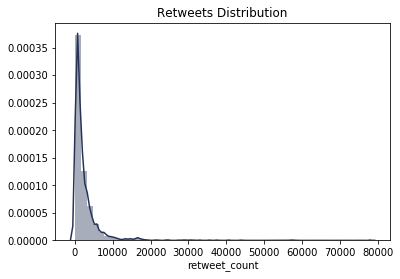

In [91]:
sns.distplot(data.retweet_count, color=blue2)
plt.title('Retweets Distribution');

Outliers present

## Zooming in!

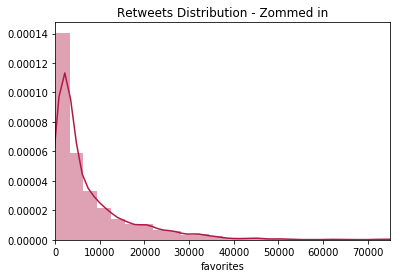

In [93]:
sns.distplot(data.favorites, color=red2)
plt.title('Retweets Distribution - Zommed in');
plt.xlim(0, 75000);

### Most retweeted

In [95]:
data.loc[data.retweet_count.argmax(), 'text']

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

In [96]:
print("Above tweet has {} retweets".format(data.loc[data.retweet_count.argmax(), 'favorites']))

Above tweet has 156720 retweets
